In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from pathlib import Path

In [2]:
# Load file
csv = Path("/Users/sukhikaur/Desktop/UCI Class Analysis/vaccination-data.csv")

# Read dataset
who_data = pd.read_csv(csv)
who_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Argentina,ARG,AMRO,REPORTING,2022-10-07,109652736.0,41324100,242.617,91.434,37840119,83.725,NaN,2020-12-29,7.0,30810184.0,68.170
1,Australia,AUS,WPRO,REPORTING,2023-07-06,68247343.0,22216819,267.638,87.125,21627933,84.816,NaN,2021-02-21,5.0,14406392.0,56.496
2,Bahrain,BHR,EMRO,REPORTING,2022-12-21,3476633.0,1241174,204.319,72.943,1226796,72.098,NaN,2020-11-04,11.0,1008663.0,59.278
3,British Virgin Islands,VGB,AMRO,REPORTING,2023-06-02,41453.0,19466,137.094,64.378,18261,60.393,NaN,2021-02-11,3.0,3726.0,12.323
4,Egypt,EGY,EMRO,REPORTING,2023-05-21,112673535.0,56907319,110.103,55.609,42337175,41.371,NaN,2021-01-24,10.0,15217352.0,14.870


In [3]:
# Clean data using headers
cleaned_who_data = who_data[['DATE_UPDATED', 'COUNTRY', 'TOTAL_VACCINATIONS', 'PERSONS_BOOSTER_ADD_DOSE', 'VACCINES_USED']]

# Rename headers to proper format
cleaned_who_data = cleaned_who_data.rename(columns={
    'DATE_UPDATED': 'Date Updated',
    'COUNTRY': 'Country',
    'TOTAL_VACCINATIONS': 'Total Vaccinations',
    'PERSONS_BOOSTER_ADD_DOSE': 'Persons with at least 1 Booster Dose',
    'VACCINES_USED': 'Vaccines Used'})
cleaned_who_data = cleaned_who_data.set_index('Date Updated')
cleaned_who_data

,Country,Total Vaccinations,Persons with at least 1 Booster Dose,Vaccines Used
Date Updated,,,,
2022-10-07,Argentina,109652736.0,30810184.0,NaN
2023-07-06,Australia,68247343.0,14406392.0,NaN
2022-12-21,Bahrain,3476633.0,1008663.0,NaN
2023-06-02,British Virgin Islands,41453.0,3726.0,NaN
2023-05-21,Egypt,112673535.0,15217352.0,NaN
...,...,...,...,...
2023-06-11,Spain,112837406.0,26563654.0,NaN
2023-06-11,Switzerland,16755470.0,4996200.0,NaN
2023-04-18,Syrian Arab Republic,5090630.0,75881.0,NaN


In [4]:
# View statistical values for total vaccinations
print("\nSummary Statistics for Total Vaccinations:")
print(cleaned_who_data['Total Vaccinations'].describe())


Summary Statistics for Total Vaccinations:
count    2.280000e+02
mean     5.917660e+07
std      2.838736e+08
min      1.170000e+02
25%      4.733035e+05
50%      4.705035e+06
75%      2.335730e+07
max      3.515873e+09
Name: Total Vaccinations, dtype: float64


In [5]:
# Show top five countries with high vaccination rates
top_vaccinated = cleaned_who_data.groupby('Country').max().sort_values(by='Total Vaccinations', ascending=False).head(5)
print("Top 5 Countries with the Most Vaccinations:")
print(top_vaccinated['Total Vaccinations'])

Top 5 Countries with the Most Vaccinations:
Country
China                       3.515873e+09
India                       2.206738e+09
United States of America    6.688820e+08
Brazil                      5.133297e+08
Indonesia                   4.475958e+08
Name: Total Vaccinations, dtype: float64


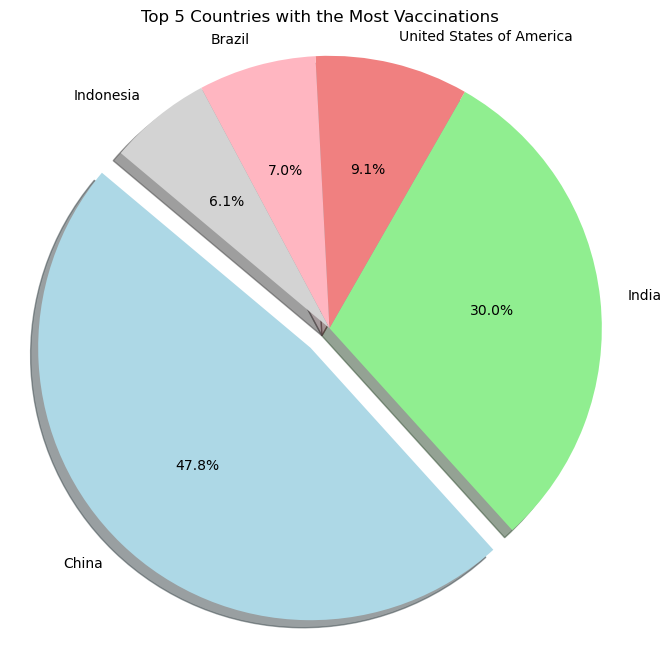

In [6]:
# Add pyplot
top_vaccinated = cleaned_who_data.groupby('Country').max().sort_values(by='Total Vaccinations', ascending=False).head(5)

# Add data
labels = ['China', 'India', 'United States of America', 'Brazil', 'Indonesia']
sizes = [3.515873e+09, 2.206738e+09, 6.688820e+08, 5.133297e+08, 4.475958e+08]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgray']
# Explode the first slice (China)
explode = (0.1, 0, 0, 0, 0) 
    
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
 
plt.title('Top 5 Countries with the Most Vaccinations')
plt.show()

In [7]:
# View statistical values for Booster Doses
print("\nSummary Statistics for Persons with at least 1 Booster Dose:")
print(cleaned_who_data['Persons with at least 1 Booster Dose'].describe())


Summary Statistics for Persons with at least 1 Booster Dose:
count    2.130000e+02
mean     1.163542e+07
std      6.093983e+07
min      0.000000e+00
25%      4.544600e+04
50%      6.404190e+05
75%      4.474108e+06
max      8.338204e+08
Name: Persons with at least 1 Booster Dose, dtype: float64


In [8]:
# Show top five countries with high booster doses
top_booster_doses = cleaned_who_data.groupby('Country').max().sort_values(by='Persons with at least 1 Booster Dose', ascending=False).head(5)
print("Top 5 Countries with the Most Booster Doses:")
print(top_booster_doses['Persons with at least 1 Booster Dose'])

Top 5 Countries with the Most Booster Doses:
Country
China                       833820382.0
India                       228793041.0
United States of America    116629517.0
Brazil                      110382337.0
Japan                        86554783.0
Name: Persons with at least 1 Booster Dose, dtype: float64


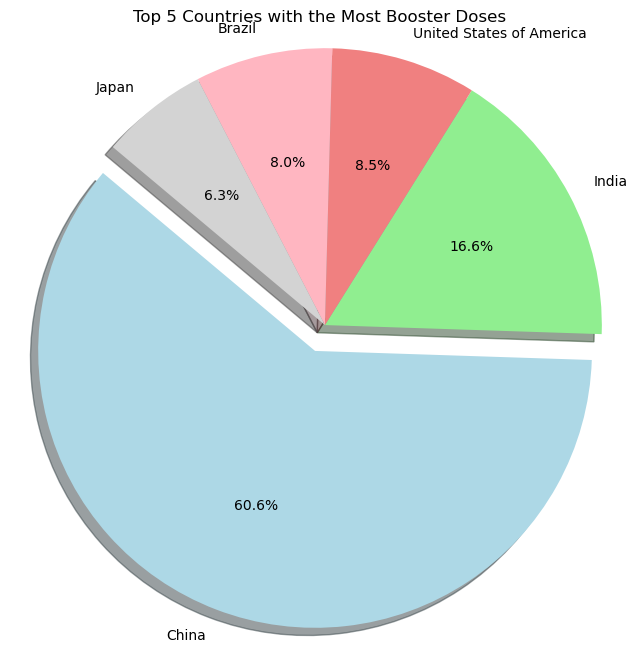

In [9]:
# Add pyplot
top_booster_doses = cleaned_who_data.groupby('Country').max().sort_values(by='Persons with at least 1 Booster Dose', ascending=False).head(5)

# Add data
labels = ['China', 'India', 'United States of America', 'Brazil', 'Japan']
sizes = [833820382.0, 228793041.0, 116629517.0, 110382337.0, 86554783.0]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgray']
# Explode the first slice (China)
explode = (0.1, 0, 0, 0, 0) 
    
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
 
plt.title('Top 5 Countries with the Most Booster Doses')
plt.show()

In [10]:
# Show United States' vaccination rate
us_who_data = cleaned_who_data[cleaned_who_data['Country']=='United States of America']
us_who_data.head()

,Country,Total Vaccinations,Persons with at least 1 Booster Dose,Vaccines Used
Date Updated,,,,
2023-06-02,United States of America,668882018.0,116629517.0,NaN


In [11]:
# Sum of total vaccination in United States of America
us_who_data['Total Vaccinations'].sum()

668882018.0

In [12]:
# Sum of total vaccination and at least one additional booster in United States of America
us_who_data['Persons with at least 1 Booster Dose'].sum()

116629517.0

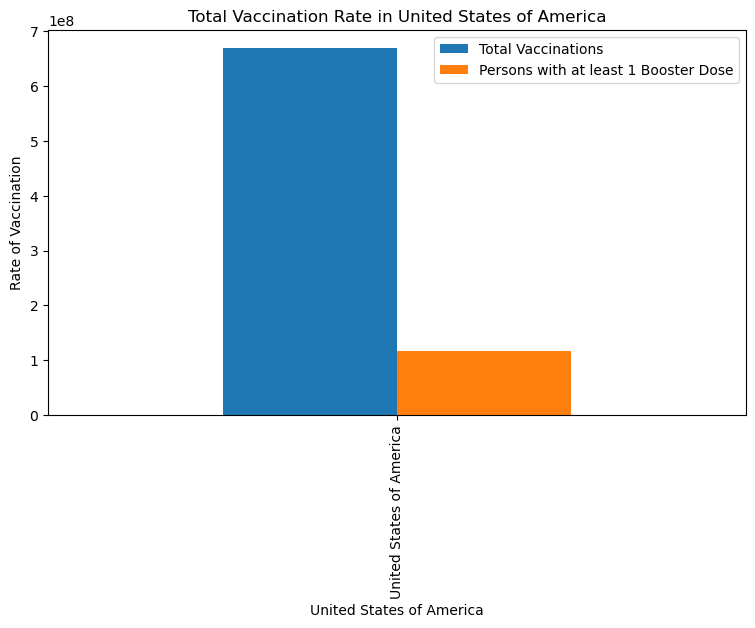

In [41]:
# Create the bar chart
bar_chart= us_who_data[:1].plot(x ="Country", y = ["Total Vaccinations", 
                                            "Persons with at least 1 Booster Dose", 
                                            ],
                                            figsize=(9,5), kind = "bar")

plt.xlabel("United States of America")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in United States of America")
# plt.tight_layout()
plt.show()

In [14]:
# Type of vaccine administered
us_who_vaccine_type = us_who_data['Vaccines Used']
us_who_vaccine_type.head()

Date Updated
2023-06-02   NaN
Name: Vaccines Used, dtype: float64

In [15]:
# Show Italy's vaccination rate
italy_who_data = cleaned_who_data[cleaned_who_data['Country']=='Italy']
italy_who_data.head()

,Country,Total Vaccinations,Persons with at least 1 Booster Dose,Vaccines Used
Date Updated,,,,
2023-06-11,Italy,150317622.0,44916242.0,NaN


In [16]:
# Sum of total vaccination in Italy 
italy_who_data['Total Vaccinations'].sum()

150317622.0

In [17]:
# Sum of total vaccination and at least one additional booster in Italy
italy_who_data['Persons with at least 1 Booster Dose'].sum()

44916242.0

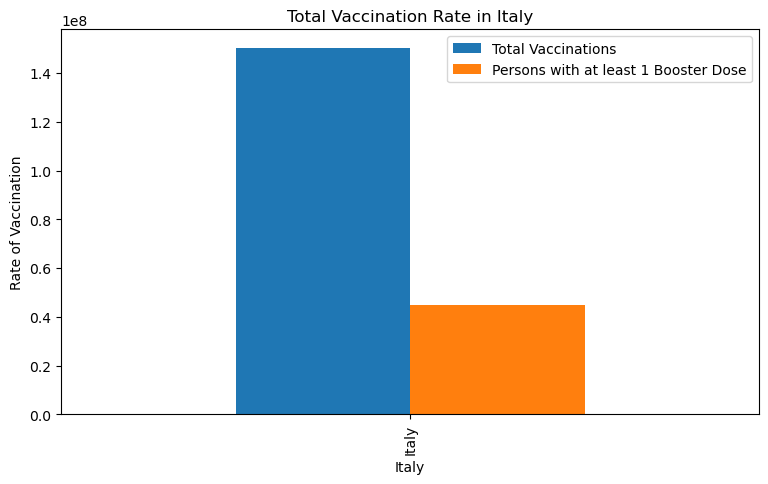

In [40]:
# Create the bar chart
bar_chart= italy_who_data[:1].plot(x ="Country", y = ["Total Vaccinations", 
                                            "Persons with at least 1 Booster Dose", 
                                            ],
                                            figsize=(9,5), kind = "bar")

plt.xlabel("Italy")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in Italy")
# plt.tight_layout()
plt.show()

In [19]:
# Type of vaccine administered
italy_who_vaccine_type = italy_who_data['Vaccines Used']
italy_who_vaccine_type.head()

Date Updated
2023-06-11   NaN
Name: Vaccines Used, dtype: float64

In [20]:
# China's vaccination rate
china_who_data = cleaned_who_data[cleaned_who_data['Country']=='China']
china_who_data.head()

,Country,Total Vaccinations,Persons with at least 1 Booster Dose,Vaccines Used
Date Updated,,,,
2023-03-23,China,3.515873e+09,833820382.0,NaN


In [21]:
# Sum of total vaccination in China
china_who_data['Total Vaccinations'].sum()

3515872818.0

In [22]:
# Sum of total vaccination and at least one additional booster in China
china_who_data['Persons with at least 1 Booster Dose'].sum()

833820382.0

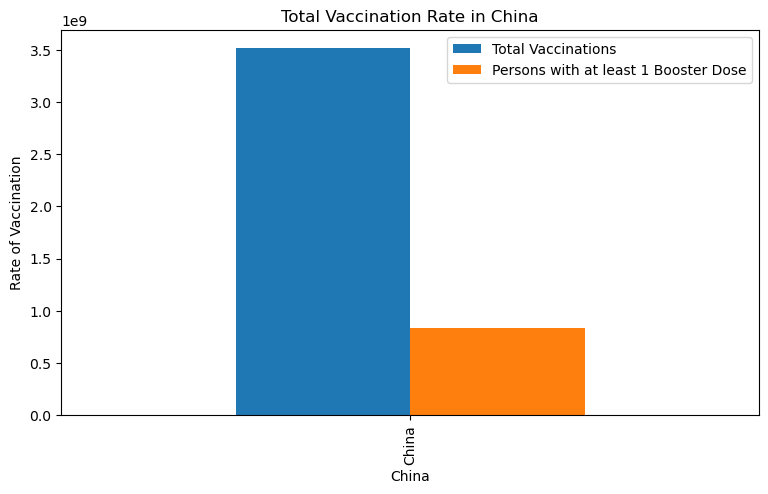

In [42]:
# Create the bar chart
bar_chart= china_who_data[:1].plot(x ="Country", y = ["Total Vaccinations", 
                                            "Persons with at least 1 Booster Dose", 
                                            ],
                                            figsize=(9,5), kind = "bar")

plt.xlabel("China")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in China")
# plt.tight_layout()
plt.show()

In [24]:
# Type of vaccine administered
china_who_vaccine_type = china_who_data['Vaccines Used']
china_who_vaccine_type.head()

Date Updated
2023-03-23   NaN
Name: Vaccines Used, dtype: float64